#### 装配(pipline)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams["axes.unicode_minus"] = False  # 正确显示负号

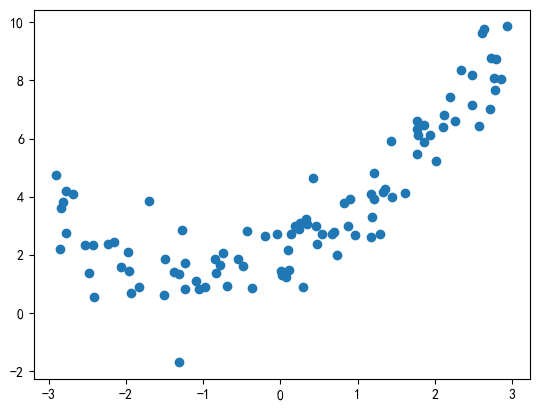

均方误差: 0.794799720626841
平均绝对误差: 0.7036755942055997


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures # 多项式特征转换
from sklearn.linear_model import LinearRegression # 线性回归
from sklearn.pipeline import Pipeline # 管道
#构造数据
X = np.random.uniform(-3,3,100)
y = 0.5*X**2 + X + 2 + np.random.normal(0,1,100)
plt.scatter(X,y)
plt.show()

from sklearn.preprocessing import StandardScaler # 标准化

# 构建管道
poly_reg = Pipeline([
    ('poly', PolynomialFeatures(degree=2)), # 多项式特征转换
    ('std_scaler', StandardScaler()), # 标准化
    ('lin_reg', LinearRegression()) # 线性回归
])

# 拟合数据,训练模型
poly_reg.fit(X.reshape(-1,1),y)

# 预测数据
y_pred = poly_reg.predict(X.reshape(-1,1))

# 绘制拟合曲线


from sklearn.metrics import mean_squared_error, mean_absolute_error # 均方误差，平均绝对误差

# 计算均方误差
mse = mean_squared_error(y,y_pred)
print("均方误差:",mse)

# 计算平均绝对误差
mae = mean_absolute_error(y,y_pred)
print("平均绝对误差:",mae)

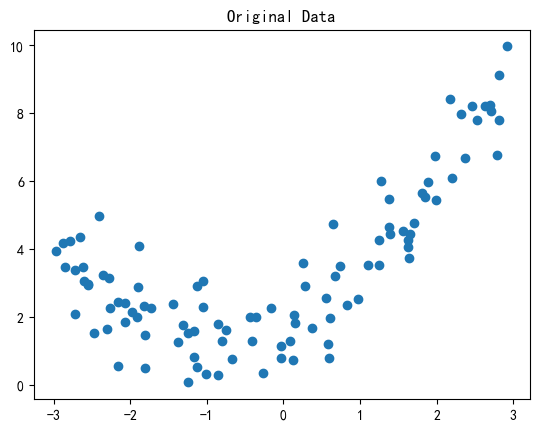

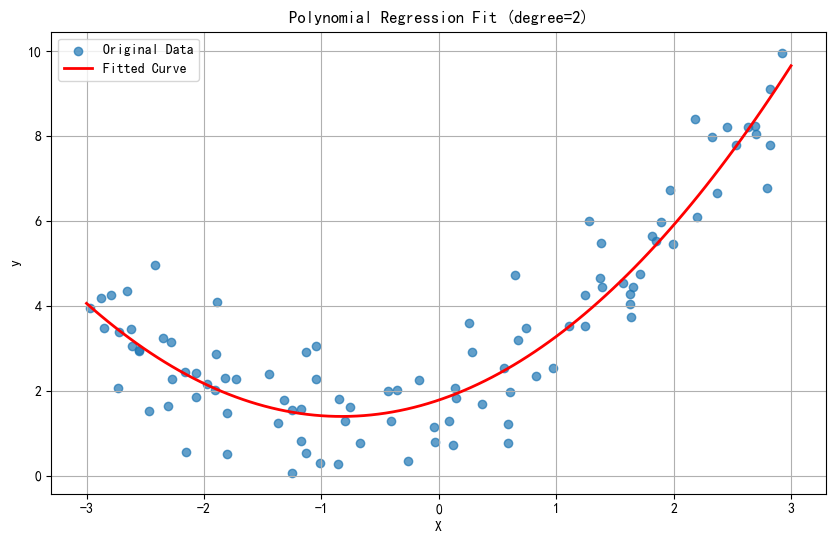

均方误差(MSE): 0.7771936663502368
平均绝对误差(MAE): 0.677864055434422

模型参数：
截距(intercept): 3.4130785883328953
系数(coefficients): [0.         1.65818609 1.50762934]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 构造数据
np.random.seed(42)  # 设置随机种子保证结果可复现
X = np.random.uniform(-3, 3, 100)
y = 0.5*X**2 + X + 2 + np.random.normal(0, 1, 100)

# 原始数据散点图
plt.scatter(X, y, label='Original Data')
plt.title("Original Data")
plt.show()

# 构建管道
poly_reg = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),  # 多项式特征转换
    ('std_scaler', StandardScaler()),       # 标准化
    ('lin_reg', LinearRegression())         # 线性回归
])

# 拟合数据,训练模型 (需要将X转换为二维数组)
poly_reg.fit(X.reshape(-1, 1), y)

# 预测数据
y_pred = poly_reg.predict(X.reshape(-1, 1))

# 绘制拟合曲线
# 为了绘制平滑曲线，我们需要按顺序排列X值
X_test = np.linspace(-3, 3, 100).reshape(-1, 1)
y_test = poly_reg.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Original Data', alpha=0.7)
plt.plot(X_test, y_test, color='red', linewidth=2, label='Fitted Curve')
plt.title("Polynomial Regression Fit (degree=2)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# 计算评估指标
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)

print("均方误差(MSE):", mse)
print("平均绝对误差(MAE):", mae)

# 输出模型参数
print("\n模型参数：")
print("截距(intercept):", poly_reg.named_steps['lin_reg'].intercept_)
print("系数(coefficients):", poly_reg.named_steps['lin_reg'].coef_)

#### 学习曲线

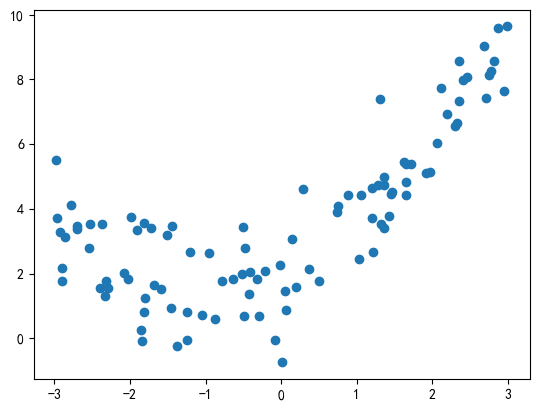

[0.0, 0.0, 0.00022807332871355588, 0.41952526963356357, 0.34872276579948286, 0.7200813649703525, 0.7543542611545734, 0.9057535346291741, 1.804697241155827, 1.8327158164781003, 2.1822536469121405, 2.2008262179542, 3.090544752547672, 2.89931187903857, 2.950449996873297, 2.8536542393227795, 2.6963591829316145, 2.601207872958722, 2.4643037744532137, 2.5352988236932616, 2.4797310426023293, 2.43295864089517, 2.5906991621273807, 2.484850504652942, 2.468604630653417, 2.3777445544509717, 2.4330158147332437, 2.3563299290028357, 2.2963900956322245, 2.220070412030437, 2.1721981091177835, 2.180341332520009, 2.8953837238530875, 2.819855190768781, 2.7429311988066774, 2.6707147451691458, 2.5985334831823717, 2.5729170959533296, 2.6301185411061843, 2.734259051102275, 2.667760593681053, 2.620513493380058, 2.6417469537507143, 2.583717704456124, 2.5268394127127096, 2.56173574853788, 2.6075069889216116, 2.587394909294685, 2.541434899700711, 2.616973159944264, 2.66098254797363, 2.820048262562461, 2.846475345

In [8]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
X = np.random.uniform(-3, 3, size=100)
y = 0.5*X**2 + X + 2 + np.random.normal(0, 1, size=100)
X = X.reshape(-1, 1)
plt.scatter(X, y)
plt.show()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

from sklearn.metrics import mean_squared_error

train_score = []
test_score = []

for i in range(1, 81):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train[:i], y_train[:i])
    y_train_predict = lin_reg.predict(X_train[:i])
    train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    y_test_predict = lin_reg.predict(X_test)
    test_score.append(mean_squared_error(y_test, y_test_predict))

print(train_score)
print(test_score)






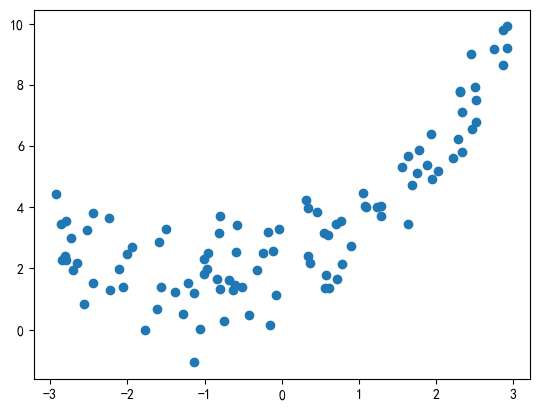

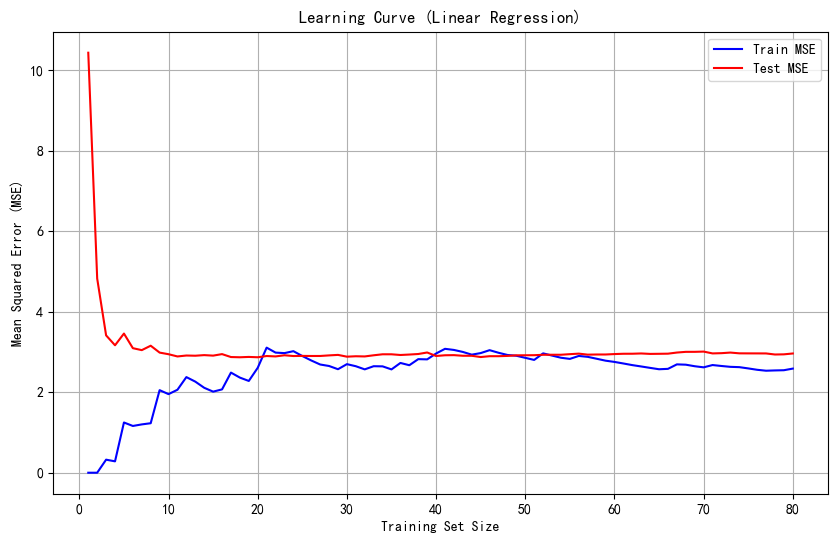

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 生成数据
np.random.seed(669)
X = np.random.uniform(-3, 3, size=100)
y = 0.5 * X**2 + X + 2 + np.random.normal(0, 1, size=100)
X = X.reshape(-1, 1)
plt.scatter(X, y)
plt.show()

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

# 训练模型并记录MSE
train_score = []
test_score = []

for i in range(1, 81):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train[:i], y_train[:i])
    y_train_predict = lin_reg.predict(X_train[:i])
    train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    y_test_predict = lin_reg.predict(X_test)
    test_score.append(mean_squared_error(y_test, y_test_predict))

# 绘制MSE曲线
plt.figure(figsize=(10, 6))
plt.plot(range(1, 81), train_score, label="Train MSE", color="blue")
plt.plot(range(1, 81), test_score, label="Test MSE", color="red")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Learning Curve (Linear Regression)")
plt.legend()
plt.grid(True)
plt.show()

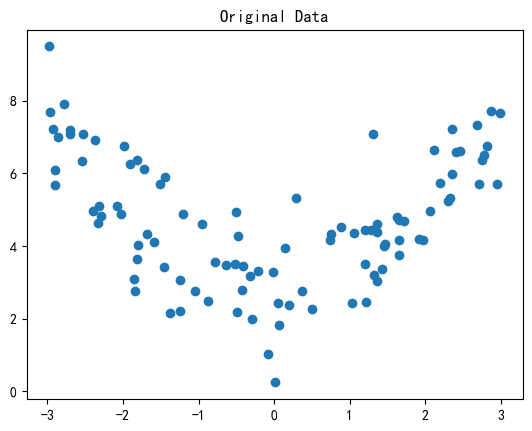

degree=2的模型的均方误差: 3293241.45149997


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 构造数据
np.random.seed(666)  # 设置随机种子保证结果可复现
X = np.random.uniform(-3, 3, 100)
y = 0.5*X**2 + 3 + np.random.normal(0, 1, 100)

# 原始数据散点图
plt.scatter(X, y, label='Original Data')
plt.title("Original Data")
plt.show()
X = X.reshape(-1, 1)


def poly_reg(degree):
    return Pipeline([
    ('poly', PolynomialFeatures(degree=degree)),  # 多项式特征转换
    ('std_scaler', StandardScaler()),       # 标准化
    ('lin_reg', LinearRegression())         # 线性回归
    ])


X_train, X_test, y_train, y_test = train_test_split(X, y)
# 构建degree=2的模型
poly_reg = poly_reg(degree=50)  # 构建degree=2的模型
poly_reg.fit(X_train, y_train)  # 训练模型
y_pred = poly_reg.predict(X_test)  # 预测结果
print("degree=2的模型的均方误差:", mean_squared_error(y_test, y_pred))


#### 岭回归

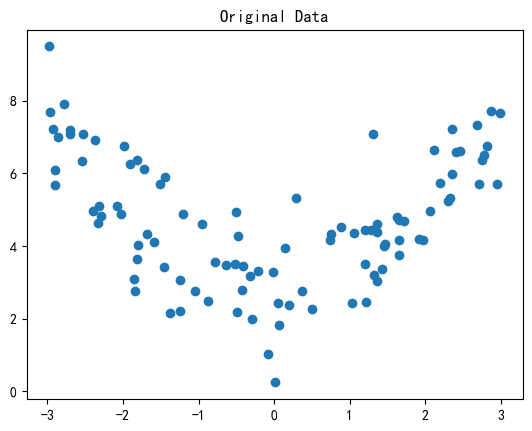

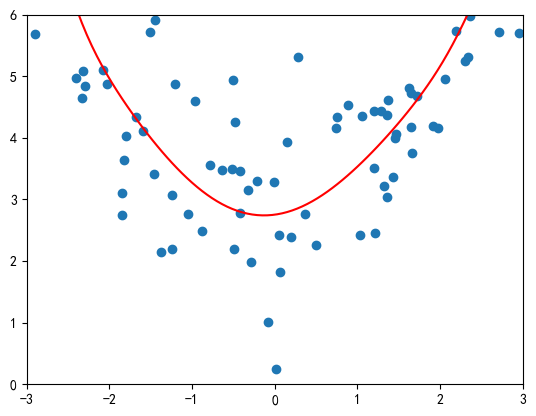

Ridge Regression: 1.1606934106502964


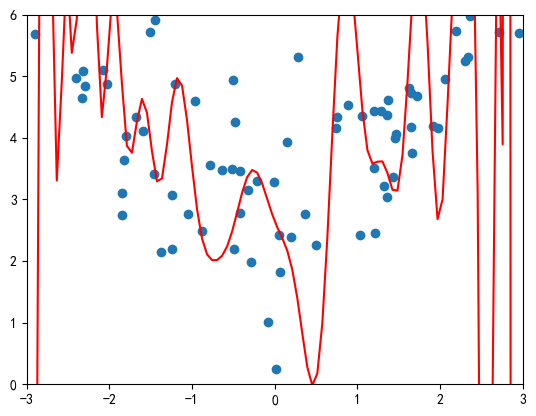

degree=2的模型的均方误差: 3293241.45149997


In [12]:
from sklearn.linear_model import Ridge

# 构造数据
np.random.seed(666)  # 设置随机种子保证结果可复现
X = np.random.uniform(-3, 3, 100)
y = 0.5*X**2 + 3 + np.random.normal(0, 1, 100)

# 原始数据散点图
plt.scatter(X, y, label='Original Data')
plt.title("Original Data")
plt.show()
X = X.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y)

def RidgeRegression(degree, alpha):
    return Pipeline(
        [
            ('poly', PolynomialFeatures(degree=degree)),
            ('std_scaler', StandardScaler()),
            ('ridge_reg', Ridge(alpha=alpha))
        ]
    )

ridge_reg = RidgeRegression(degree=50, alpha=0.1)
ridge_reg.fit(X_train, y_train)
y1_pred = ridge_reg.predict(X_test)

# 封装图
def plot_model(model):
    X_plot = np.linspace(-3,3,100).reshape(100,1)
    y_plot = model.predict(X_plot)

    plt.scatter(X,y)
    plt.plot(X_plot[:,0],y_plot,'r')
    plt.axis([-3,3,0,6])
    plt.show()

plot_model(ridge_reg)
print('Ridge Regression:', mean_squared_error(y_test, y1_pred))
plot_model(poly_reg)
print("degree=2的模型的均方误差:", mean_squared_error(y_test, y_pred))

#### Lasso回归

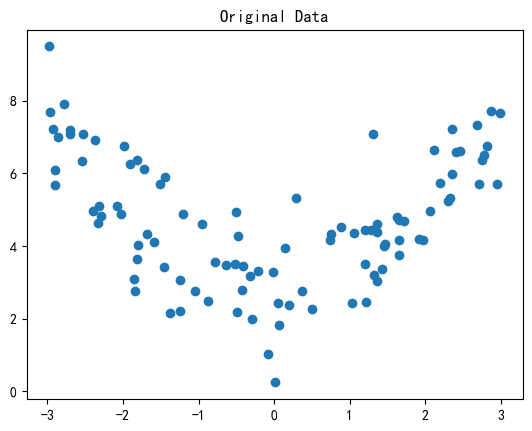

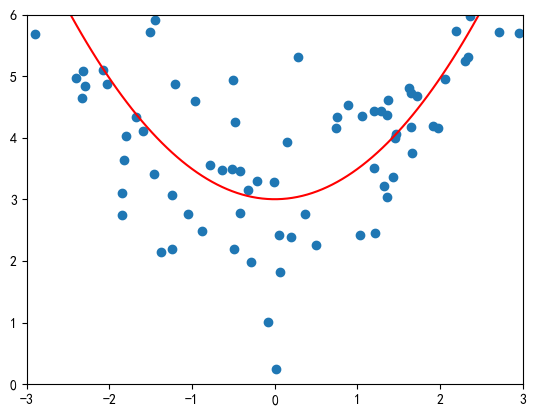

Lasso Regression: 1.0782532863607863


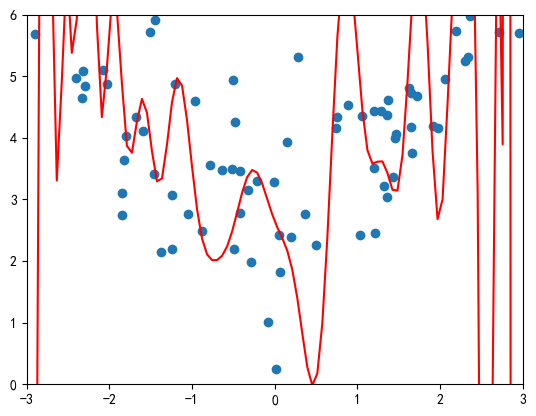

degree=2的模型的均方误差: 3293241.45149997


In [14]:
from sklearn.linear_model import Lasso

# 构造数据
np.random.seed(666)  # 设置随机种子保证结果可复现
X = np.random.uniform(-3, 3, 100)
y = 0.5*X**2 + 3 + np.random.normal(0, 1, 100)

# 原始数据散点图
plt.scatter(X, y, label='Original Data')
plt.title("Original Data")
plt.show()
X = X.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y)

def LassoRegression(degree, alpha):
    return Pipeline(
        [
            ('poly', PolynomialFeatures(degree=degree)),
            ('std_scaler', StandardScaler()),
            ('lasso_reg', Lasso(alpha=alpha))
        ]
    )

lasso_reg = LassoRegression(degree=50, alpha=0.1)
lasso_reg.fit(X_train, y_train)
y1_pred = lasso_reg.predict(X_test)

# 封装图
def plot_model(model):
    X_plot = np.linspace(-3,3,100).reshape(100,1)
    y_plot = model.predict(X_plot)

    plt.scatter(X,y)
    plt.plot(X_plot[:,0],y_plot,'r')
    plt.axis([-3,3,0,6])
    plt.show()

plot_model(lasso_reg)
print('Lasso Regression:', mean_squared_error(y_test, y1_pred))
plot_model(poly_reg)
print("degree=2的模型的均方误差:", mean_squared_error(y_test, y_pred))

#### 对比 普通多项式回归（无正则化）、Ridge 回归（L2 正则化） 和 Lasso 回归（L1 正则化） 在相同数据集上的表现

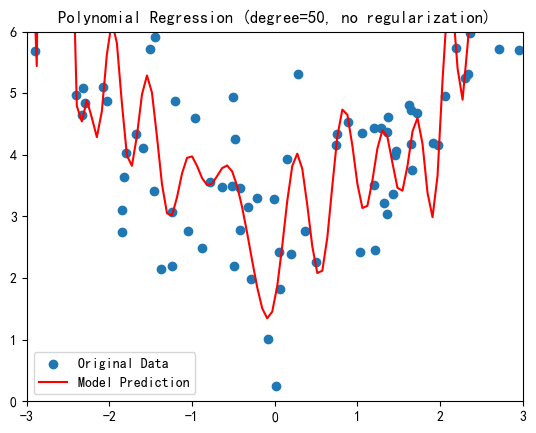

多项式回归 (degree=50) MSE: 384.62477640064674


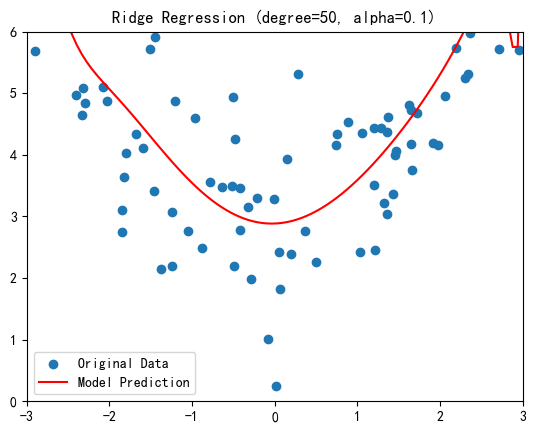

Ridge 回归 MSE: 0.980220390159975


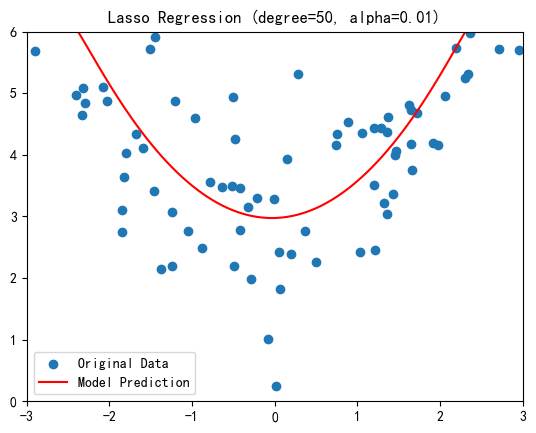

Lasso 回归 MSE: 0.9535392875625037


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

# 设置随机种子
np.random.seed(666)

# 生成数据
X = np.random.uniform(-3, 3, 100)
y = 0.5 * X**2 + 3 + np.random.normal(0, 1, 100)
X = X.reshape(-1, 1)

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

# 定义通用绘图函数
def plot_model(model, title):
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)
    
    plt.scatter(X, y, label='Original Data')
    plt.plot(X_plot[:, 0], y_plot, 'r', label='Model Prediction')
    plt.axis([-3, 3, 0, 6])
    plt.title(title)
    plt.legend()
    plt.show()

# 1. 普通多项式回归（无正则化）
def PolynomialRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lin_reg', LinearRegression())
    ])

poly_reg = PolynomialRegression(degree=50)
poly_reg.fit(X_train, y_train)
y_poly_pred = poly_reg.predict(X_test)
mse_poly = mean_squared_error(y_test, y_poly_pred)

plot_model(poly_reg, "Polynomial Regression (degree=50, no regularization)")
print("多项式回归 (degree=50) MSE:", mse_poly)

# 2. Ridge 回归（L2 正则化）
def RidgeRegression(degree, alpha):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('ridge_reg', Ridge(alpha=alpha))
    ])

ridge_reg = RidgeRegression(degree=50, alpha=0.1)
ridge_reg.fit(X_train, y_train)
y_ridge_pred = ridge_reg.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_ridge_pred)

plot_model(ridge_reg, "Ridge Regression (degree=50, alpha=0.1)")
print("Ridge 回归 MSE:", mse_ridge)

# 3. Lasso 回归（L1 正则化）
def LassoRegression(degree, alpha):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lasso_reg', Lasso(alpha=alpha))
    ])

lasso_reg = LassoRegression(degree=50, alpha=0.01)  # Lasso 需要更小的 alpha
lasso_reg.fit(X_train, y_train)
y_lasso_pred = lasso_reg.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_lasso_pred)

plot_model(lasso_reg, "Lasso Regression (degree=50, alpha=0.01)")
print("Lasso 回归 MSE:", mse_lasso)